In [37]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from numpy import argmax
from sklearn.metrics import precision_score, recall_score, f1_score
from keras import backend as K

In [44]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

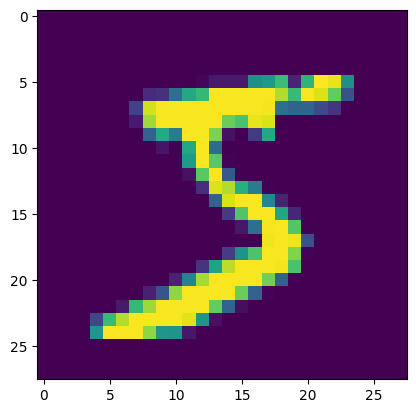

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as img
plt.imshow(train_images[0])
print(train_labels[0])
print(train_images[0])

0


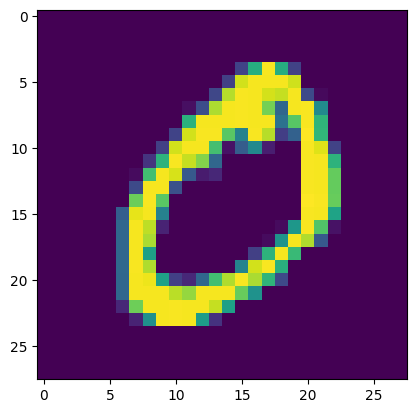

In [56]:
plt.imshow(train_images[1])
print(train_labels[1])

In [18]:
network = models.Sequential()
# sequential模型->layer間線性序列排序, 輸出會做為下一層的輸入

network.add(layers.Input(shape=(28 * 28, )))
network.add(layers.Dense(1000, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
# 可以用add的方式把layer加上去, 最後的就是輸出層
# dense是一個全連接層, 第一個參數是神經元數量

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# 做正規化
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

Train labels shape: (60000, 10)
Test labels shape: (10000, 10)


In [30]:
history = network.fit(train_images, train_labels, epochs=1, batch_size=128, validation_split=0.2)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

prediction = network.predict(train_images)
prediction_label = argmax(prediction, axis=1)
truth_label = argmax(train_labels, axis=1)

presicion = precision_score(truth_label, prediction_label, average="weighted")
recall = recall_score(truth_label, prediction_label, average="weighted")
f1 = f1_score(truth_label, prediction_label, average="weighted")

print("-"*50)
print("訓練集績效:")
print("Precision score:", presicion)
print("Recall score:", recall)
print("F1 score:", f1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9992 - loss: 0.0045 - val_accuracy: 0.9830 - val_loss: 0.0723
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9823 - loss: 0.0698
test_acc: 0.984499990940094
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
--------------------------------------------------
訓練集績效:
Precision score: 0.9963509523766846
Recall score: 0.99635
F1 score: 0.9963496239654532


In [31]:
prediction = network.predict(test_images)

prediction_label = argmax(prediction, axis=1)
truth_label = argmax(test_labels, axis=1)

presicion = precision_score(truth_label, prediction_label, average="weighted")
recall = recall_score(truth_label, prediction_label, average="weighted")
f1 = f1_score(truth_label, prediction_label, average="weighted")

print("-"*50)
print("測試集績效:")
print("Precision score:", presicion)
print("Recall score:", recall)
print("F1 score:", f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
--------------------------------------------------
測試集績效:
Precision score: 0.9845356069720105
Recall score: 0.9845
F1 score: 0.9845032035690847


**超參數實驗**

In [38]:
def create_model(input_size, layer_number, unites_number, activation, optimizer):
    model = models.Sequential()
    model.add(layers.Input(shape=(input_size,)))
    for i in range(layer_number):
        model.add(layers.Dense(unites_number, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
    return model

layers_to_test = [1, 2, 3]
unites_number = [64, 128, 256, 512, 1024]
epochs_to_test = [5, 10, 20]
batch_size = [32, 64, 128, 256]

all_record = []

activation = 'relu'
optimizers = ['adam', 'rmsprop']
input_size = train_images.shape[1]
train_truth_label = argmax(train_labels, axis=1)
test_truth_label = argmax(test_labels, axis=1)


for lay in layers_to_test:
    for unit in unites_number:
        for epo in epochs_to_test:
            for bat in batch_size:
                for optimizer in optimizers:
                    test_model = create_model(input_size, lay, unit, activation, optimizer)
                    history = test_model.fit(train_images, train_labels, epochs=epo, batch_size=bat, verbose=2)
                    test_loss, test_acc = test_model.evaluate(test_images, test_labels)
                    
                    train_prediction = test_model.predict(train_images)
                    train_prediction_label = argmax(train_prediction, axis=1)
            
                    train_precision = precision_score(train_truth_label, train_prediction_label, average="weighted", zero_division=1)
                    train_recall = recall_score(train_truth_label, train_prediction_label, average="weighted", zero_division=1)
                    train_f1 = f1_score(train_truth_label, train_prediction_label, average="weighted", zero_division=1)
                    
                    print("-"*50)
                    print(f"隱藏層{lay}, 節點{unit}, epoch{epo}, batch{bat} 訓練集績效:")
                    print("Precision Score:", train_precision)
                    print("Recall Score:", train_recall)
                    print("F1 Score", train_f1)
    
                    test_prediction = test_model.predict(test_images)
                    test_prediction_label = argmax(test_prediction, axis=1)
                    
                    test_precision = precision_score(test_truth_label, test_prediction_label, average="weighted", zero_division=1)
                    test_recall = recall_score(test_truth_label, test_prediction_label, average="weighted", zero_division=1)
                    test_f1 = f1_score(test_truth_label, test_prediction_label, average="weighted", zero_division=1)
                    
                    print("-"*50)
                    print(f"隱藏層{lay}, 節點{unit}, epoch{epo}, batch{bat} 測試集績效:")
                    print("Precision Score:", test_precision)
                    print("Recall Score:", test_recall)
                    print("F1 Score", test_f1)
    
                    current_result = {"layer": lay,
                                      "units": unit,
                                      "epochs": epo,
                                      "batch_size": bat,
                                      "activation": activation,
                                      "optimizer": optimizer,
                                      "train_precision": train_precision,
                                      "train_recall": train_recall,
                                      "train_f1": train_f1,
                                      "test_precision": test_precision,
                                      "test_recall": test_recall,
                                      "test_f1": test_f1
                                     }
                    
                    all_record.append(current_result)
                    K.clear_session()
    print("="*50)
    print(f"Completed batch for layer {lay}")
    print("="*50)

Epoch 1/5
1875/1875 - 3s - 2ms/step - acc: 0.9128 - loss: 0.3072
Epoch 2/5
1875/1875 - 2s - 1ms/step - acc: 0.9576 - loss: 0.1452
Epoch 3/5
1875/1875 - 3s - 1ms/step - acc: 0.9687 - loss: 0.1063
Epoch 4/5
1875/1875 - 2s - 1ms/step - acc: 0.9748 - loss: 0.0833
Epoch 5/5
1875/1875 - 2s - 1ms/step - acc: 0.9786 - loss: 0.0705
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9648 - loss: 0.1126
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
--------------------------------------------------
隱藏層1, 節點64, epoch5, batch32 訓練集績效:
Precision Score: 0.9819863182944305
Recall Score: 0.9818166666666667
F1 Score 0.9817856884469943
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--------------------------------------------------
隱藏層1, 節點64, epoch5, batch32 測試集績效:
Precision Score: 0.9694186180968071
Recall Score: 0.9691
F1 Score 0.969041739798803

Epoch 1/5
1875/1875 - 3s - 2ms/step - acc: 0.9164 - loss: 0.2937
Epoch 2/5
1875/1875 - 2s - 1ms/step - acc: 0.9570 - loss: 0.1459
Epoch 3/5
1875/1875 - 2s - 1ms/step -

In [39]:
print(all_record)

[{'layer': 1, 'units': 64, 'epochs': 5, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.9819863182944305, 'train_recall': 0.9818166666666667, 'train_f1': 0.9817856884469943, 'test_precision': 0.9694186180968071, 'test_recall': 0.9691, 'test_f1': 0.969041739798803}, {'layer': 1, 'units': 64, 'epochs': 5, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'rmsprop', 'train_precision': 0.9814885369920594, 'train_recall': 0.9814166666666667, 'train_f1': 0.9814127958239065, 'test_precision': 0.9738613850870086, 'test_recall': 0.9738, 'test_f1': 0.973787409548254}, {'layer': 1, 'units': 64, 'epochs': 5, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.9802833546988728, 'train_recall': 0.9802333333333333, 'train_f1': 0.9802164271362876, 'test_precision': 0.9715969965996556, 'test_recall': 0.9715, 'test_f1': 0.9714681808175385}, {'layer': 1, 'units': 64, 'epochs': 5, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'rmspr

In [41]:
import pandas as pd
record_data_forConvert = pd.DataFrame(all_record)
record_df = pd.DataFrame.from_records(record_data_forConvert)
record_df

,layer,units,epochs,batch_size,activation,optimizer,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
0,1,64,5,32,relu,adam,0.981986,0.981817,0.981786,0.969419,0.9691,0.969042
1,1,64,5,32,relu,rmsprop,0.981489,0.981417,0.981413,0.973861,0.9738,0.973787
2,1,64,5,64,relu,adam,0.980283,0.980233,0.980216,0.971597,0.9715,0.971468
3,1,64,5,64,relu,rmsprop,0.978067,0.977900,0.977896,0.968967,0.9688,0.968812
4,1,64,5,128,relu,adam,0.975075,0.975050,0.975023,0.966797,0.9668,0.966768
...,...,...,...,...,...,...,...,...,...,...,...,...
355,3,1024,20,64,relu,rmsprop,0.999151,0.999150,0.999150,0.984048,0.9840,0.983994
356,3,1024,20,128,relu,adam,0.997462,0.997450,0.997451,0.982624,0.9825,0.982508
357,3,1024,20,128,relu,rmsprop,0.999850,0.999850,0.999850,0.985018,0.9850,0.984997
358,3,1024,20,256,relu,adam,0.997723,0.997717,0.997717,0.982128,0.9820,0.982011


In [43]:
record_df.to_csv('./lab1.csv', index=False)

In [58]:
mask = record_df['optimizer'] == 'rmsprop'

new_record_df = record_df[~mask]

new_record_df

,layer,units,epochs,batch_size,activation,optimizer,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
0,1,64,5,32,relu,adam,0.981986,0.981817,0.981786,0.969419,0.9691,0.969042
2,1,64,5,64,relu,adam,0.980283,0.980233,0.980216,0.971597,0.9715,0.971468
4,1,64,5,128,relu,adam,0.975075,0.975050,0.975023,0.966797,0.9668,0.966768
6,1,64,5,256,relu,adam,0.966627,0.966567,0.966554,0.960551,0.9604,0.960364
8,1,64,10,32,relu,adam,0.993750,0.993733,0.993733,0.975071,0.9750,0.974990
...,...,...,...,...,...,...,...,...,...,...,...,...
350,3,1024,10,256,relu,adam,0.994613,0.994533,0.994543,0.979724,0.9795,0.979510
352,3,1024,20,32,relu,adam,0.998117,0.998117,0.998117,0.981818,0.9818,0.981790
354,3,1024,20,64,relu,adam,0.997972,0.997967,0.997967,0.982093,0.9820,0.981999
356,3,1024,20,128,relu,adam,0.997462,0.997450,0.997451,0.982624,0.9825,0.982508


In [59]:
grouped = new_record_df.groupby('layer')

grouped_dfs = []

for layer, group in grouped:
    group_name = f"group_layer_{layer}"
    group_df = pd.DataFrame(group)
    grouped_dfs.append((group_name, group_df))

grouped_dfs

[('group_layer_1',
       layer  units  epochs  batch_size activation optimizer  train_precision   
  0        1     64       5          32       relu      adam         0.981986  \
  2        1     64       5          64       relu      adam         0.980283   
  4        1     64       5         128       relu      adam         0.975075   
  6        1     64       5         256       relu      adam         0.966627   
  8        1     64      10          32       relu      adam         0.993750   
  10       1     64      10          64       relu      adam         0.990237   
  12       1     64      10         128       relu      adam         0.987397   
  14       1     64      10         256       relu      adam         0.980676   
  16       1     64      20          32       relu      adam         0.998041   
  18       1     64      20          64       relu      adam         0.997905   
  20       1     64      20         128       relu      adam         0.996405   
  22     

In [60]:
grouped = new_record_df.groupby(['layer', 'units', 'epochs', 'batch_size'])

# 對每個分組計算所需的統計信息
grouped_stats = grouped.agg({
    'train_precision': ['mean', 'std', 'max', 'min'],
    'train_recall': ['mean', 'std', 'max', 'min'],
    'train_f1': ['mean', 'std', 'max', 'min'],
    'test_precision': ['mean', 'std', 'max', 'min'],
    'test_recall': ['mean', 'std', 'max', 'min'],
    'test_f1': ['mean', 'std', 'max', 'min']
})

In [72]:
group_name = 'group_layer_1'
group_df = next(df for name, df in grouped_dfs if name == group_name)
# print(group_df)

sorted_group_df = group_df[['layer', 'units', 'epochs', 'batch_size', 'train_precision', 'train_recall', 'train_f1', 'test_precision', 'test_recall', 'test_f1']]
sorted_group_df = sorted_group_df.sort_values(by='test_precision', ascending=False)
sorted_group_df

,layer,units,epochs,batch_size,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
116,1,1024,20,128,1.000000,1.000000,1.000000,0.986311,0.9863,0.986302
118,1,1024,20,256,1.000000,1.000000,1.000000,0.984105,0.9841,0.984100
110,1,1024,10,256,0.999251,0.999250,0.999250,0.983741,0.9837,0.983702
92,1,512,20,128,0.999883,0.999883,0.999883,0.983372,0.9833,0.983311
88,1,512,20,32,0.998551,0.998550,0.998550,0.982486,0.9824,0.982412
70,1,256,20,256,0.999917,0.999917,0.999917,0.982324,0.9823,0.982302
100,1,1024,5,128,0.995785,0.995767,0.995770,0.982306,0.9822,0.982212
94,1,512,20,256,1.000000,1.000000,1.000000,0.981919,0.9819,0.981896
60,1,256,10,128,0.997774,0.997767,0.997767,0.981836,0.9818,0.981805
68,1,256,20,128,0.999950,0.999950,0.999950,0.981698,0.9817,0.981697


In [73]:
sorted_group_df = sorted_group_df.sort_values(by='test_recall', ascending=False)
sorted_group_df

,layer,units,epochs,batch_size,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
116,1,1024,20,128,1.000000,1.000000,1.000000,0.986311,0.9863,0.986302
118,1,1024,20,256,1.000000,1.000000,1.000000,0.984105,0.9841,0.984100
110,1,1024,10,256,0.999251,0.999250,0.999250,0.983741,0.9837,0.983702
92,1,512,20,128,0.999883,0.999883,0.999883,0.983372,0.9833,0.983311
88,1,512,20,32,0.998551,0.998550,0.998550,0.982486,0.9824,0.982412
70,1,256,20,256,0.999917,0.999917,0.999917,0.982324,0.9823,0.982302
100,1,1024,5,128,0.995785,0.995767,0.995770,0.982306,0.9822,0.982212
94,1,512,20,256,1.000000,1.000000,1.000000,0.981919,0.9819,0.981896
60,1,256,10,128,0.997774,0.997767,0.997767,0.981836,0.9818,0.981805
68,1,256,20,128,0.999950,0.999950,0.999950,0.981698,0.9817,0.981697


In [74]:
sorted_group_df = sorted_group_df.sort_values(by='test_f1', ascending=False)
sorted_group_df

,layer,units,epochs,batch_size,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
116,1,1024,20,128,1.000000,1.000000,1.000000,0.986311,0.9863,0.986302
118,1,1024,20,256,1.000000,1.000000,1.000000,0.984105,0.9841,0.984100
110,1,1024,10,256,0.999251,0.999250,0.999250,0.983741,0.9837,0.983702
92,1,512,20,128,0.999883,0.999883,0.999883,0.983372,0.9833,0.983311
88,1,512,20,32,0.998551,0.998550,0.998550,0.982486,0.9824,0.982412
70,1,256,20,256,0.999917,0.999917,0.999917,0.982324,0.9823,0.982302
100,1,1024,5,128,0.995785,0.995767,0.995770,0.982306,0.9822,0.982212
94,1,512,20,256,1.000000,1.000000,1.000000,0.981919,0.9819,0.981896
60,1,256,10,128,0.997774,0.997767,0.997767,0.981836,0.9818,0.981805
68,1,256,20,128,0.999950,0.999950,0.999950,0.981698,0.9817,0.981697


In [69]:
group_name = 'group_layer_1'
group_df = next(df for name, df in grouped_dfs if name == group_name)
# print(group_df)

sorted_group_df = group_df[['layer', 'units', 'epochs', 'batch_size', 'train_precision', 'train_recall', 'train_f1', 'test_precision', 'test_recall', 'test_f1']]
sorted_group_df = sorted_group_df.sort_values(by='test_precision', ascending=True)
sorted_group_df

,layer,units,epochs,batch_size,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
6,1,64,5,256,0.966627,0.966567,0.966554,0.960551,0.9604,0.960364
4,1,64,5,128,0.975075,0.975050,0.975023,0.966797,0.9668,0.966768
14,1,64,10,256,0.980676,0.980600,0.980606,0.968335,0.9683,0.968303
30,1,128,5,256,0.975667,0.975567,0.975530,0.968972,0.9688,0.968748
0,1,64,5,32,0.981986,0.981817,0.981786,0.969419,0.9691,0.969042
2,1,64,5,64,0.980283,0.980233,0.980216,0.971597,0.9715,0.971468
10,1,64,10,64,0.990237,0.990183,0.990175,0.973276,0.9732,0.973191
20,1,64,20,128,0.996405,0.996400,0.996400,0.973931,0.9739,0.973900
16,1,64,20,32,0.998041,0.998033,0.998034,0.974205,0.9741,0.974099
28,1,128,5,128,0.984111,0.984083,0.984080,0.974304,0.9743,0.974288


In [77]:
sorted_group_df = sorted_group_df.sort_values(by=['test_precision', 'test_recall', 'test_f1'], ascending=[False, False, False])
sorted_group_df

,layer,units,epochs,batch_size,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
116,1,1024,20,128,1.000000,1.000000,1.000000,0.986311,0.9863,0.986302
118,1,1024,20,256,1.000000,1.000000,1.000000,0.984105,0.9841,0.984100
110,1,1024,10,256,0.999251,0.999250,0.999250,0.983741,0.9837,0.983702
92,1,512,20,128,0.999883,0.999883,0.999883,0.983372,0.9833,0.983311
88,1,512,20,32,0.998551,0.998550,0.998550,0.982486,0.9824,0.982412
70,1,256,20,256,0.999917,0.999917,0.999917,0.982324,0.9823,0.982302
100,1,1024,5,128,0.995785,0.995767,0.995770,0.982306,0.9822,0.982212
94,1,512,20,256,1.000000,1.000000,1.000000,0.981919,0.9819,0.981896
60,1,256,10,128,0.997774,0.997767,0.997767,0.981836,0.9818,0.981805
68,1,256,20,128,0.999950,0.999950,0.999950,0.981698,0.9817,0.981697


In [79]:
group_name = 'group_layer_2'
group_df = next(df for name, df in grouped_dfs if name == group_name)
# print(group_df)

sorted_group_df = group_df[['layer', 'units', 'epochs', 'batch_size', 'train_precision', 'train_recall', 'train_f1', 'test_precision', 'test_recall', 'test_f1']]
sorted_group_df = sorted_group_df.sort_values(by=['test_precision', 'test_recall', 'test_f1'], ascending=[True, True, True])
sorted_group_df

,layer,units,epochs,batch_size,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
126,2,64,5,256,0.976707,0.976650,0.976657,0.966189,0.9661,0.966089
134,2,64,10,256,0.984725,0.984583,0.984576,0.969357,0.9690,0.968984
124,2,64,5,128,0.980005,0.979900,0.979900,0.970086,0.9697,0.969706
122,2,64,5,64,0.983590,0.983433,0.983439,0.972585,0.9724,0.972431
154,2,128,10,64,0.993743,0.993667,0.993676,0.972617,0.9722,0.972244
150,2,128,5,256,0.986369,0.986333,0.986333,0.972981,0.9729,0.972906
148,2,128,5,128,0.988885,0.988833,0.988830,0.973042,0.9728,0.972775
138,2,64,20,64,0.994705,0.994650,0.994649,0.973303,0.9730,0.972991
132,2,64,10,128,0.990678,0.990633,0.990638,0.973809,0.9737,0.973693
130,2,64,10,64,0.990401,0.990333,0.990327,0.973921,0.9738,0.973805


In [81]:
group_name = 'group_layer_3'
group_df = next(df for name, df in grouped_dfs if name == group_name)
# print(group_df)

sorted_group_df = group_df[['layer', 'units', 'epochs', 'batch_size', 'train_precision', 'train_recall', 'train_f1', 'test_precision', 'test_recall', 'test_f1']]
sorted_group_df = sorted_group_df.sort_values(by=['test_precision', 'test_recall', 'test_f1'], ascending=[True, True, True])
sorted_group_df

,layer,units,epochs,batch_size,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
246,3,64,5,256,0.975845,0.975733,0.975736,0.968857,0.9688,0.968795
244,3,64,5,128,0.982197,0.982083,0.982062,0.969649,0.9696,0.969559
342,3,1024,5,256,0.984460,0.984033,0.983967,0.970105,0.9693,0.969175
240,3,64,5,32,0.984612,0.984533,0.984531,0.970173,0.9700,0.969995
270,3,128,5,256,0.983383,0.983017,0.983033,0.970756,0.9701,0.970133
260,3,64,20,128,0.991874,0.991800,0.991786,0.971151,0.9708,0.970778
248,3,64,10,32,0.989634,0.989517,0.989513,0.972017,0.9718,0.971755
242,3,64,5,64,0.986105,0.986067,0.986056,0.972700,0.9725,0.972479
254,3,64,10,256,0.986932,0.986867,0.986854,0.972807,0.9727,0.972690
252,3,64,10,128,0.992082,0.992067,0.992065,0.973765,0.9737,0.973687


[{'layer': 2, 'units': 64, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.9981542052497664, 'train_recall': 0.99815, 'train_f1': 0.9981504539078294, 'test_precision': 0.9740360699099502, 'test_recall': 0.974, 'test_f1': 0.9739972118472795}, {'layer': 2, 'units': 64, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'rmsprop', 'train_precision': 0.9972407730101432, 'train_recall': 0.9972333333333333, 'train_f1': 0.9972340568406748, 'test_precision': 0.9775476152584839, 'test_recall': 0.9775, 'test_f1': 0.9775027867742472}]
[{'layer': 2, 'units': 128, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.9963484817370523, 'train_recall': 0.9963333333333333, 'train_f1': 0.9963334839638083, 'test_precision': 0.9805417362953536, 'test_recall': 0.9804, 'test_f1': 0.980401448484472}, {'layer': 2, 'units': 128, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'rmsprop',

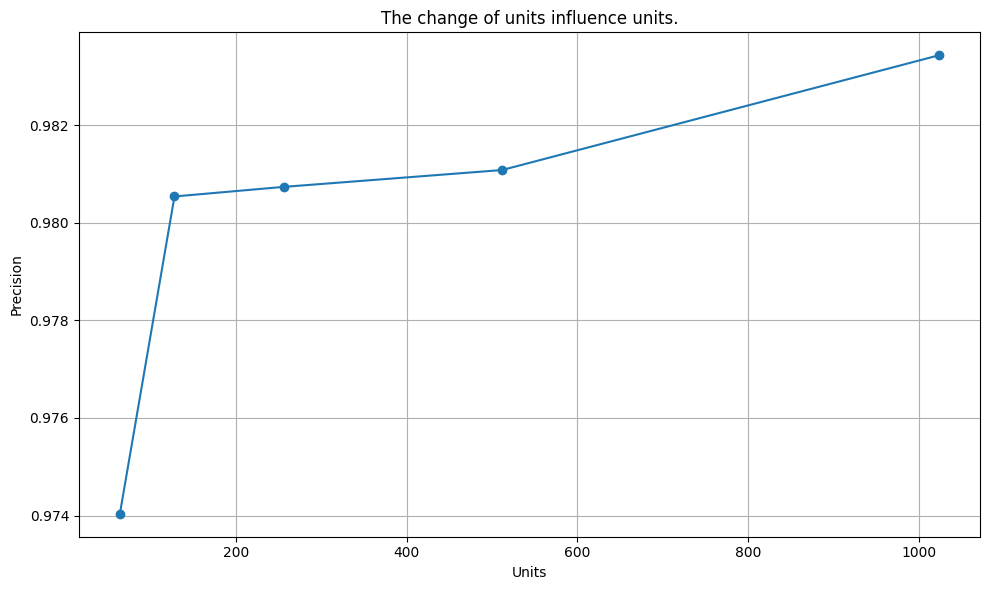

In [110]:
import matplotlib.pyplot as plt

layer_to_test = 2
epoch_to_test = 20
batch_size_to_test = 32

# 固定的層數、epoch、batch_size
unit_numbers = [64, 128, 256, 512, 1024]  # 不同的 units
precision_scores = []

for unit_num in unit_numbers:
    # 過濾 找出藥用的
    filtered_records = [record for record in all_record if 
                        record["batch_size"] == batch_size_to_test and
                        record["epochs"] == epoch_to_test and
                        record["units"] == unit_num and
                        record["layer"] == layer_to_test]
    print(filtered_records)
    precision_scores.append([record["test_precision"] for record in filtered_records][0])

plt.figure(figsize=(10, 6))
plt.plot(unit_numbers, precision_scores, marker='o')

plt.xlabel('Units')
plt.ylabel('Precision')
plt.title('The change of units influence units.')
plt.grid(True)

plt.tight_layout()
plt.show()